In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('house_prices.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
train_numerical = df.select_dtypes(include=['float']).copy()

In [7]:
train_numerical.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [8]:
train_numerical = train_numerical['MasVnrArea']

In [9]:
train_numerical.head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [10]:
target = df['SalePrice']

In [11]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

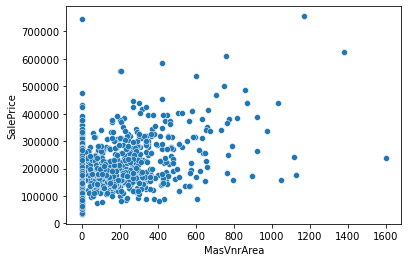

In [12]:
sns.scatterplot(x=train_numerical, y=target);

In [13]:
df_dataset = pd.DataFrame()
df_dataset['x'] = train_numerical
df_dataset['y'] = target

In [14]:
df_dataset['x'] = df_dataset['x'].fillna(df_dataset.x.mean())

In [15]:
df_dataset['x'] = df_dataset['x'].apply(np.int64)

In [16]:
df_dataset.isna().sum()

x    0
y    0
dtype: int64

In [17]:
df_dataset = df_dataset[df_dataset.x != 0]

In [18]:
df_dataset

,x,y
0,196,208500
2,162,223500
4,350,250000
6,186,307000
7,240,200000
...,...,...
1446,189,157900
1447,438,240000
1451,194,287090
1452,80,145000


<AxesSubplot:xlabel='x', ylabel='y'>

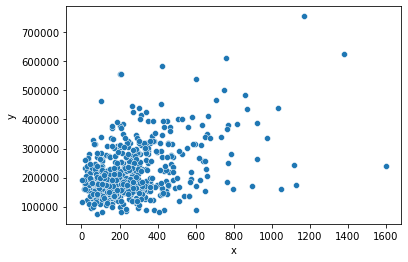

In [19]:
sns.scatterplot(data=df_dataset, x='x', y='y')

In [20]:
df_dataset.to_csv('simple_linear_regression.csv')

In [21]:
df_dataset.head()

,x,y
0,196,208500
2,162,223500
4,350,250000
6,186,307000
7,240,200000


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
regressor = LinearRegression()

In [25]:
X = df_dataset['x']
y = df_dataset['y']

In [26]:
scaler.fit(df_dataset)
result_df = pd.DataFrame(scaler.transform(df_dataset), columns=['x', 'y'])

In [27]:
result_df.to_csv('simple_linear_regression.csv')

In [28]:
X.head()

0    196
2    162
4    350
6    186
7    240
Name: x, dtype: int64

In [29]:
y.head()

0    208500
2    223500
4    250000
6    307000
7    200000
Name: y, dtype: int64

In [30]:
regressor.fit(X.to_frame(), y)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score 

In [32]:
predictions = regressor.predict(X.to_frame())

In [33]:
r2_score(y, predictions)

0.1825184100092455

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
train_numerical = df.select_dtypes(include=['int64']).copy()

In [36]:
train_numerical.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [37]:
y = df.SalePrice

In [38]:
X = train_numerical[['LotArea', 'YearBuilt']]

In [39]:
X = X.rename({'LotArea': 'x1', 'YearBuilt': 'x2'}, axis=1)

In [40]:
X['y'] = y

In [41]:
X.head()

,x1,x2,y
0,8450,2003,208500
1,9600,1976,181500
2,11250,2001,223500
3,9550,1915,140000
4,14260,2000,250000


In [42]:
X.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [43]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X);

In [44]:
X = pd.DataFrame(X, columns=['x1', 'x2', 'y'])

In [45]:
X.head()

,x1,x2,y
0,-0.207142,1.050994,0.347273
1,-0.091886,0.156734,0.007288
2,0.073480,0.984752,0.536154
3,-0.096897,-1.863632,-0.515281
4,0.375148,0.951632,0.869843


In [46]:
X_train = X[['x1', 'x2']]
y_train = X[['y']]

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

ols = sm.OLS(y_train, X_train)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 12 Aug 2021   Prob (F-statistic):          8.54e-132
Time:                        14:40:51   Log-Likelihood:                -1769.2
No. Observations:                1460   AIC:                             3544.
Df Residuals:                    1457   BIC:                             3560.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e-16      0.021   6.11e-15      1.000      -0.042       0.042
x1             0.2565      0.021     12.041      0.000       0.215       0.298
x2             0.5192      0.021     24.379      0.000       0.477       0.561
==============================================================================
Omnibus:                      741.084   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7175.267
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      12.969   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
predictions = regressor.predict(X_train)

In [49]:
r2_score(y_train, predictions)

0.3391778159070442

In [50]:
regressor.intercept_

array([-3.92068599e-16])

In [51]:
regressor.coef_

array([[0.25645567, 0.51924857]])

In [52]:
X.to_csv('multiple_regression_dataset.csv')